In [1]:
from collections import defaultdict
import sys; sys.path.append('..')

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from web_server import WebServer
from bandit import EpsilonGreedy, UCB, Softmax, ThompsonSampling

In [2]:
# 実験設定
## 腕の数
n_arm = 50

## ラウンド回数
T = 1000

## シミュレーション回数
n_sim = 250

## epsilon
range_epsilon = [0.3, 0.6]

## softmax の tau
range_tau = [0.5, 1.5]

## TS方策の事前分布 (無情報)
alpha, beta = 1., 1.

## 推定量の更新バッチサイズ
batch_size=1

In [3]:
## 時刻ごとにサイトに訪れたユーザーリクエストに応じて、アクションをレスポンスして報酬を受け取るwebサーバー
web_server = WebServer(n_arm=n_arm)

In [4]:
results = defaultdict(lambda: defaultdict(list))


for _ in tqdm(range(n_sim)):
    # Epsilon Greedy
    for epsilon in range_epsilon:
        model = EpsilonGreedy(n_arm=n_arm, T=T, epsilon=epsilon, batch_size=1)
        metrics = model.run(web_server)
        
        model_name = f"EpsilonGreedy_{epsilon}"
        for metric_name, metric_values in metrics.items():
            results[model_name][metric_name].append(metric_values)
    
    # UCB
    model = UCB(n_arm=n_arm, T=T, batch_size=batch_size)
    metrics = model.run(web_server)
    
    model_name = "UCB"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)
    
    
    # Softmax
    for tau in range_tau:
        model = Softmax(n_arm=n_arm, T=T, tau=tau, batch_size=batch_size)
        metrics = model.run(web_server)
        
        model_name = f"Softmax_{tau}"
        for metric_name, metric_values in metrics.items():
            results[model_name][metric_name].append(metric_values)
        
    
    # ThompsonSampling
    model = ThompsonSampling(n_arm=n_arm, T=T, alpha=alpha, beta=beta, batch_size=batch_size)
    metrics = model.run(web_server)
    
    model_name = "ThmpsonSampling"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)


mean_results = defaultdict(dict)
for policy_name, metrics in results.items():
    for metric_name, metric_values in metrics.items():
        mean_results[metric_name][policy_name] = np.array(metric_values).mean(0)

100% 250/250 [00:15<00:00, 15.83it/s]


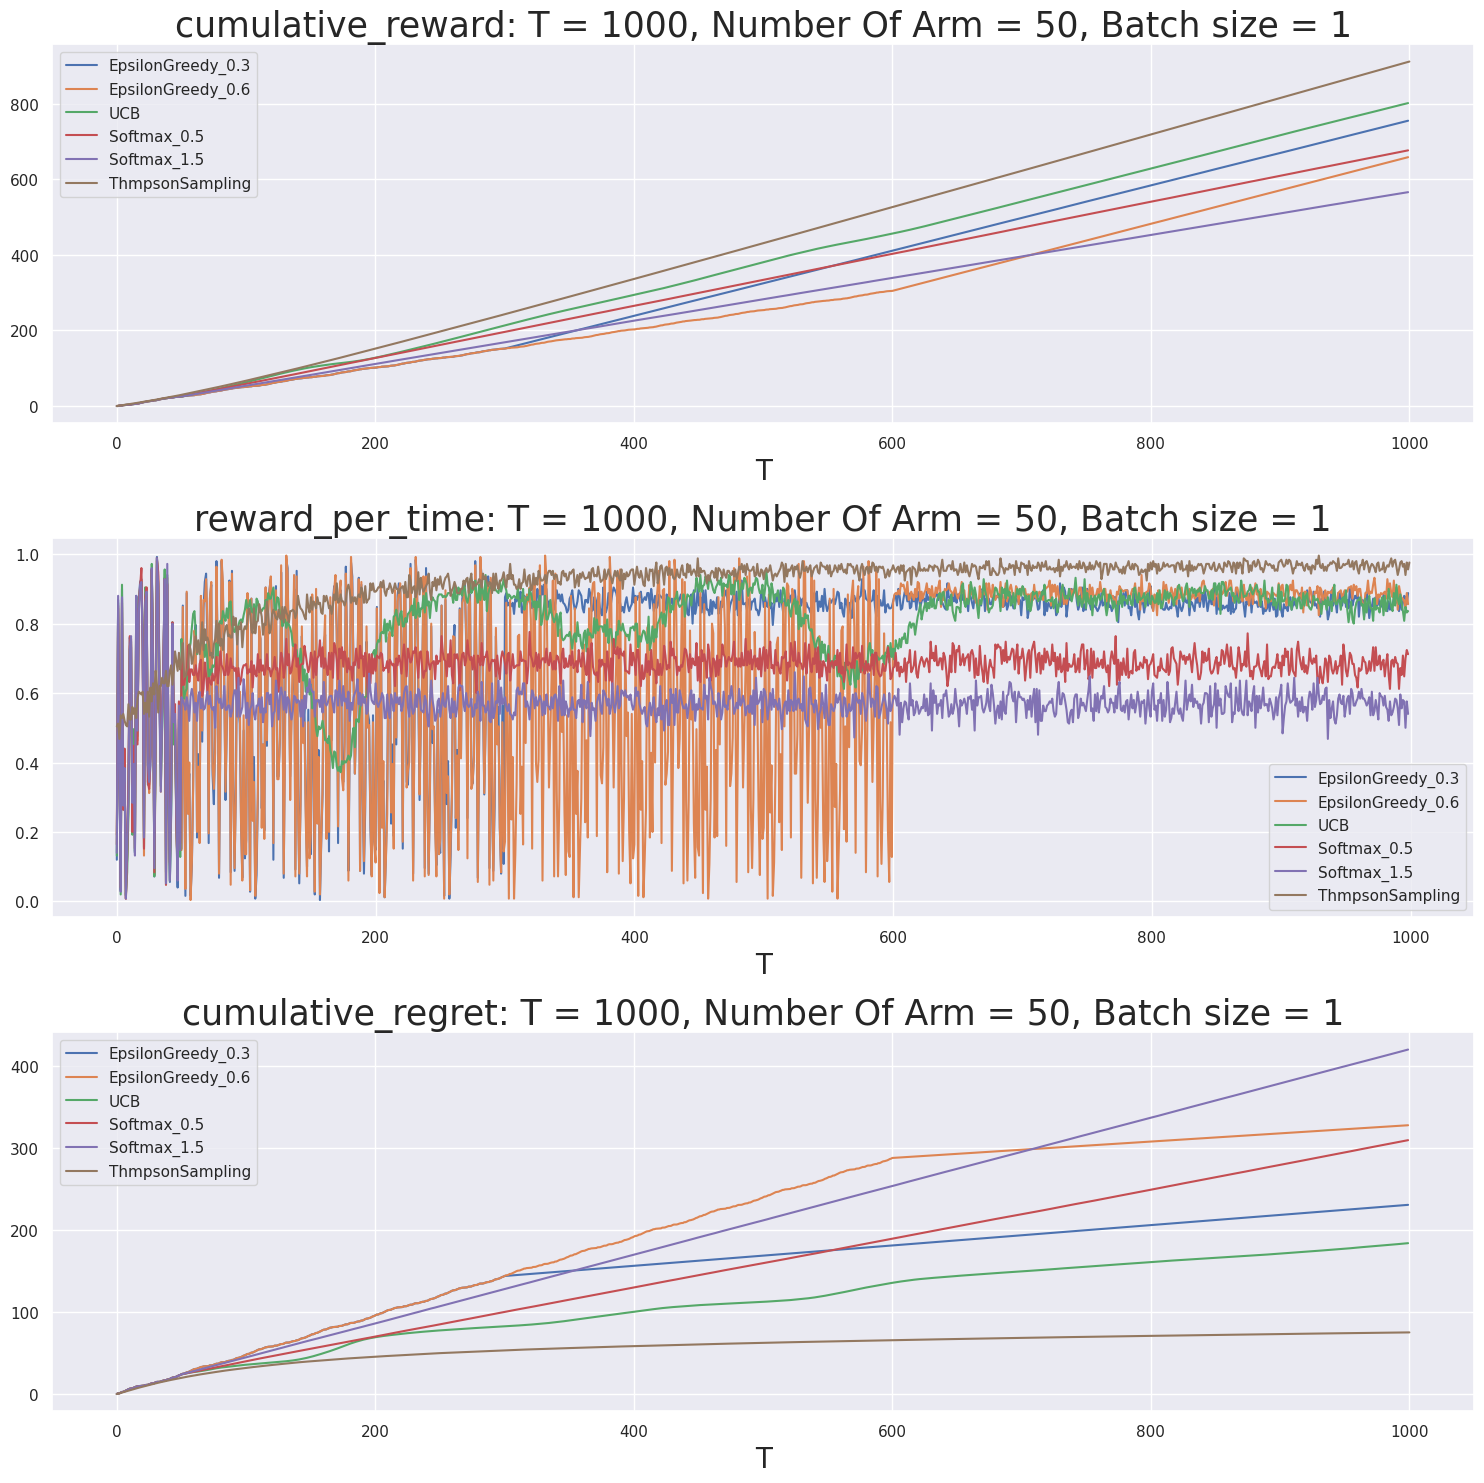

In [5]:
# plot
plt.figure(figsize=(15,15))

for index, metric_name in enumerate(mean_results):
    plt.subplot(3, 1, index + 1)
    plt.title(f'{metric_name}: T = {T}, Number Of Arm = {n_arm}, Batch size = {batch_size}', fontsize=25)
    
    for policy_name, metric_values in mean_results[metric_name].items():
        plt.plot(metric_values, label=policy_name)
        
    plt.xlabel('T', fontsize=20)
    plt.legend()
    plt.tight_layout()

        
plt.show()
    

In [6]:
# 推定量をバッチで更新し

In [7]:
# 実験設定
## 腕の数
n_arm = 10

## ラウンド回数
T = 10000

## シミュレーション回数
n_sim = 250

## softmax の tau
range_tau = [0.5, 1.5]

## TS方策の事前分布 (無情報)
alpha, beta = 1., 1.

## 推定量の更新バッチサイズ
batch_size=1000

In [8]:
## 時刻ごとにサイトに訪れたユーザーリクエストに応じて、アクションをレスポンスして報酬を受け取るwebサーバー
web_server = WebServer(n_arm=n_arm)

In [9]:
results = defaultdict(lambda: defaultdict(list))


for _ in tqdm(range(n_sim)):

    # UCB
    model = UCB(n_arm=n_arm, T=T, batch_size=batch_size)
    metrics = model.run(web_server)
    
    model_name = "UCB"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)
    
    
    # Softmax
    for tau in range_tau:
        model = Softmax(n_arm=n_arm, T=T, tau=tau, batch_size=batch_size)
        metrics = model.run(web_server)
        
        model_name = f"Softmax_{tau}"
        for metric_name, metric_values in metrics.items():
            results[model_name][metric_name].append(metric_values)
        
    
    # ThompsonSampling
    model = ThompsonSampling(n_arm=n_arm, T=T, alpha=alpha, beta=beta, batch_size=batch_size)
    metrics = model.run(web_server)
    
    model_name = "ThmpsonSampling"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)


mean_results = defaultdict(dict)
for policy_name, metrics in results.items():
    for metric_name, metric_values in metrics.items():
        mean_results[metric_name][policy_name] = np.array(metric_values).mean(0)

100% 250/250 [01:36<00:00,  2.60it/s]


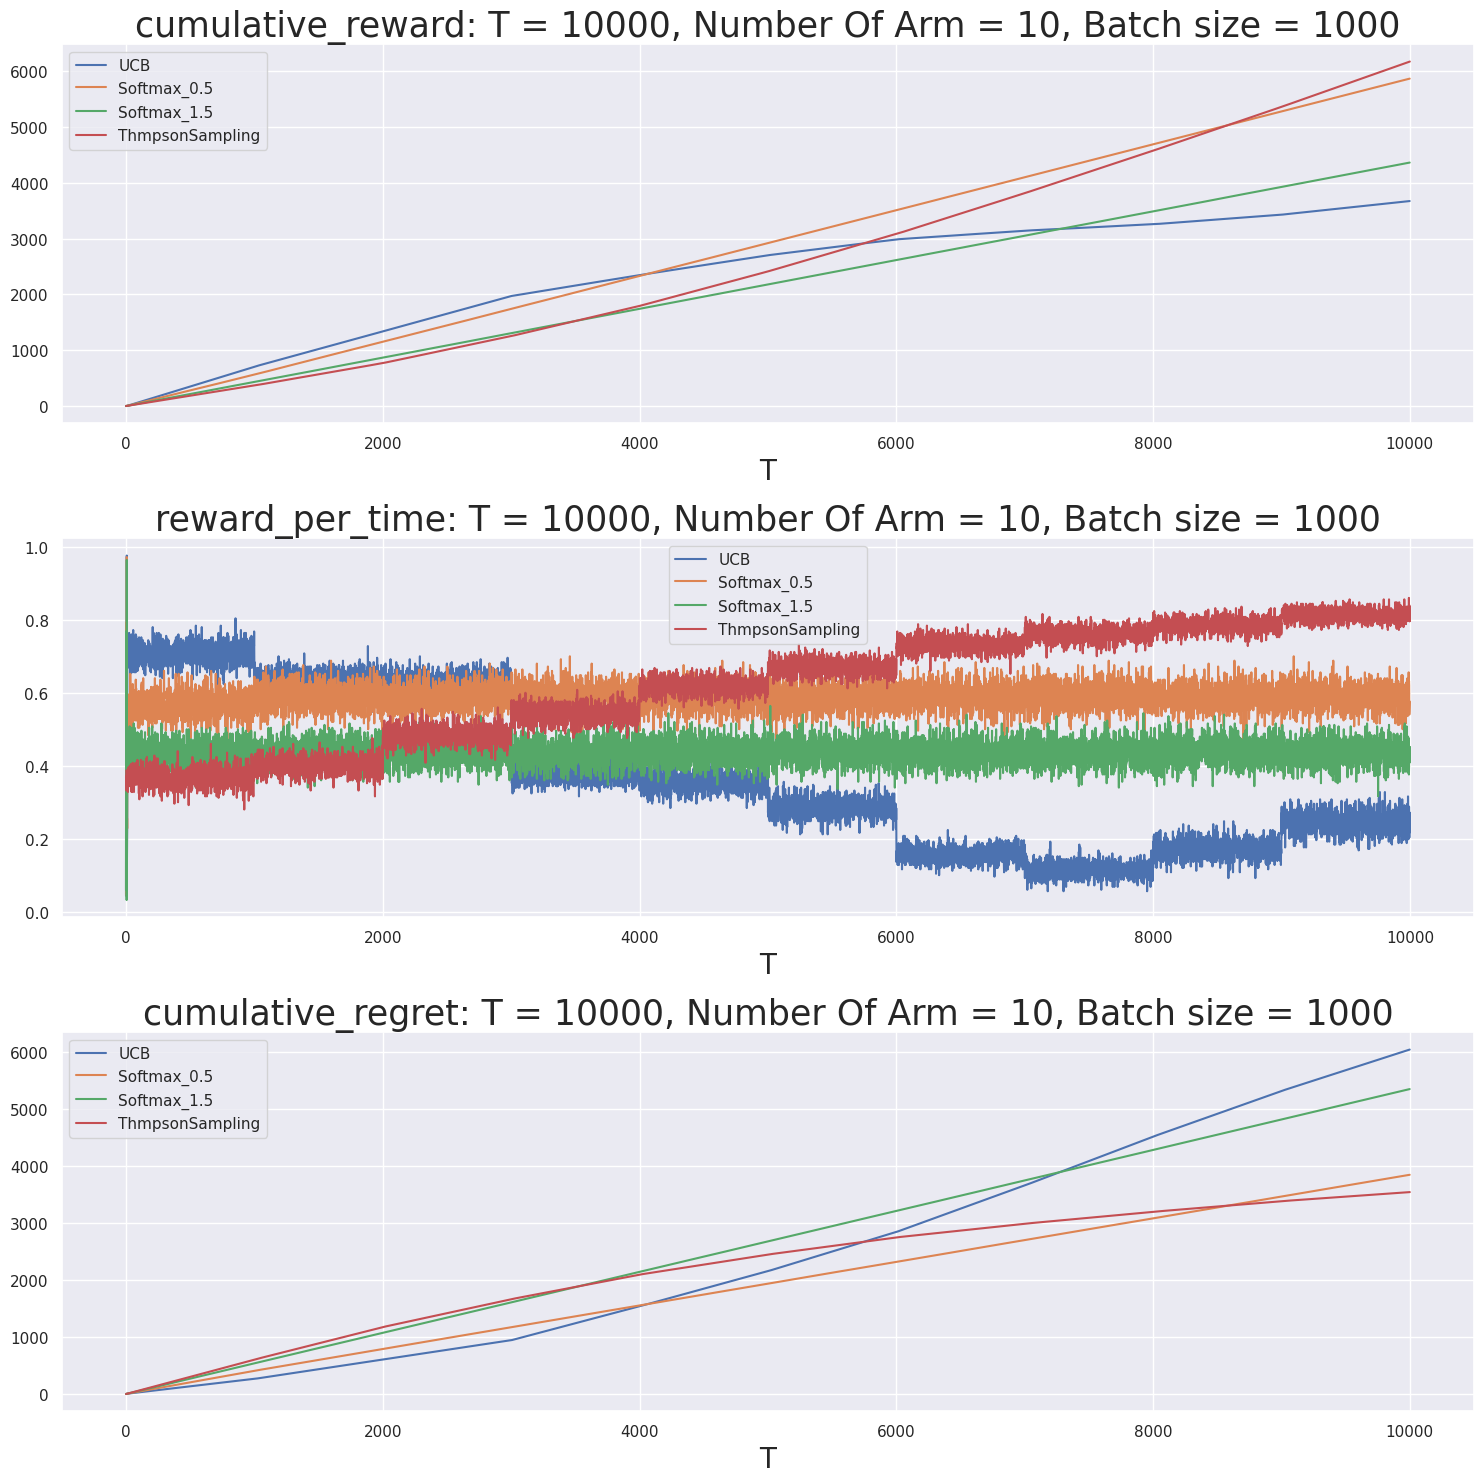

In [10]:
# plot
plt.figure(figsize=(15,15))

for index, metric_name in enumerate(mean_results):
    plt.subplot(3, 1, index + 1)
    plt.title(f'{metric_name}: T = {T}, Number Of Arm = {n_arm}, Batch size = {batch_size}', fontsize=25)
    
    for policy_name, metric_values in mean_results[metric_name].items():
        plt.plot(metric_values, label=policy_name)
        
    plt.xlabel('T', fontsize=20)
    plt.legend()
    plt.tight_layout()

        
plt.show()
    